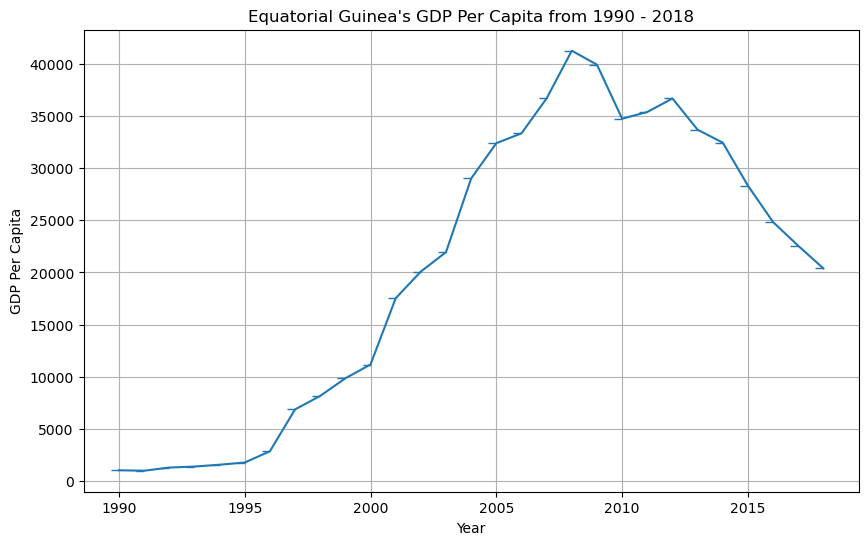

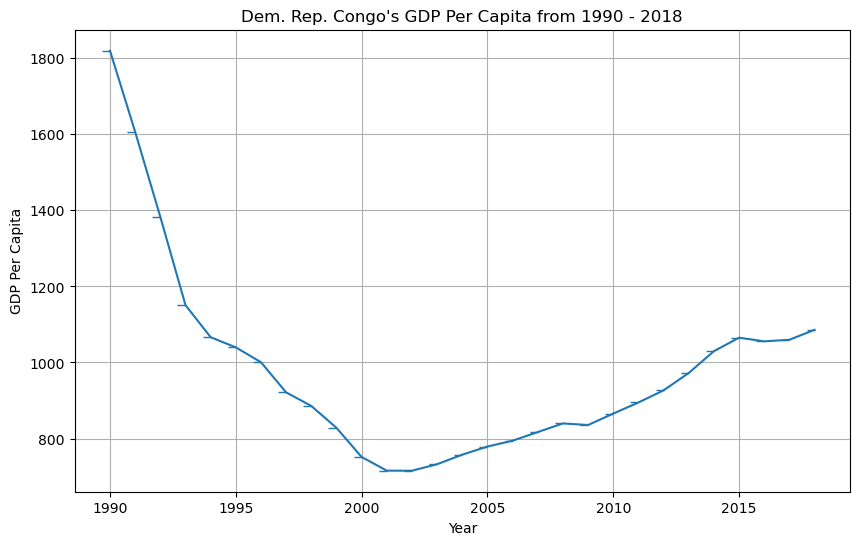

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



gdp_df = pd.read_csv("../data/UNdata_Export_20230915_015125007.csv")

gdp_df.head(20)

gdp_df.drop(columns="Value Footnotes")


renamed = gdp_df.rename(columns={gdp_df.columns[0]:'Country',gdp_df.columns[1]: 'Year', gdp_df.columns[2]: 'GDP_Per_Capita'})

num_columns = gdp_df.shape[1]
num_columns

num_rows = gdp_df.shape[0]
num_rows

column_types = gdp_df.dtypes
column_types


renamed = gdp_df.rename(columns={gdp_df.columns[0]:'Country',gdp_df.columns[1]: 'Year', gdp_df.columns[2]: 'GDP_Per_Capita'})

renamed.dtypes

diff_years = renamed['Year'].unique()

count_per_year = renamed['Year'].value_counts()
count_per_year

diff_countries = renamed['Country'].unique()
diff_countries

num_diff_countries = renamed['Country'].nunique()
num_diff_countries

frequency_countries = renamed['Country'].value_counts()
least_frequent_countries = frequency_countries.tail(10)
least_frequent_countries

gdp_2014 = renamed[renamed['Year'] <= 2014]
gdp_2014

summary_stats = gdp_2014.describe()


gdp_2014 = gdp_2014.drop(columns='Value Footnotes')

gdp_2014.head(10)

gdp_only_2014 = gdp_2014[gdp_2014['Year'] == 2014]
gdp_only_2014

# plt.hist(gdp_2014['GDP_Per_Capita'], bins=20, edgecolor='k')


renamed = renamed.drop(columns='Value Footnotes')

gdp_2018 = renamed[renamed['Year'] == 2018]
gdp_2018

top_5 = gdp_2018.nlargest(5, 'GDP_Per_Capita')
top_5

bottom_5 = gdp_2018.nsmallest(5, 'GDP_Per_Capita')
bottom_5

gdp_df = renamed

pivot = gdp_df[gdp_df['Year'].isin([1990, 2018])].pivot(index='Country', columns='Year', values="GDP_Per_Capita").dropna(subset=[1990, 2018])

pivot.tail(30)

pivot["Percent Change"] = 100 * (pivot[2018] - pivot[1990]) / pivot[1990]

pivot.tail(30)

negative_growth_countries = pivot[pivot['Percent Change'] < 0]
negative_growth_countries

highest_growth_country = pivot['Percent Change'].idxmax()
highest_growth_country

highest_growth_value = pivot.loc[highest_growth_country, 'Percent Change']
highest_growth_value

lowest_growth_country = pivot['Percent Change'].idxmin()

country_data_highest_growth_data = gdp_df[(gdp_df['Country'] == highest_growth_country) & (gdp_df['Year'].between(1990, 2018))]
country_data_lowest_growth_data = gdp_df[(gdp_df['Country'] == lowest_growth_country) & (gdp_df['Year'].between(1990, 2018))]

plt.figure(figsize=(10,6))
country_data_highest_growth_data.set_index('Year')['GDP_Per_Capita'].plot(linestyle='-', marker=0)
plt.title(f"{highest_growth_country}'s GDP Per Capita from 1990 - 2018")
plt.ylabel('GDP Per Capita')
plt.xlabel('Year')
plt.grid(True)
plt.show()


plt.figure(figsize=(10,6))
country_data_lowest_growth_data.set_index('Year')['GDP_Per_Capita'].plot(linestyle='-', marker=0)
plt.title(f"{lowest_growth_country}'s GDP Per Capita from 1990 - 2018")
plt.ylabel('GDP Per Capita')
plt.xlabel('Year')
plt.grid(True)
plt.show()